In [1]:
library(ggplot2) #data visualization
library(dplyr) #data manipulation
library(ISLR) #for the dataset



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
df = read.csv("startups.csv")

In [3]:
head(df)

,X,Company,City,Starting.Year,Founders,Industries,No..of.Employees,Funding.Amount.in..,Funding.Round,No..of.Investors,Industries_type.1,Industries_type.2,age,age_category
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
1,0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Industry",1001-5000,445920356,12,16,Apps,Home Services,6,old company
2,1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi","B2B, E-Learning, EdTech, Education, Mobile Apps, SaaS, Software",101-250,89506451,10,20,B2B,E-Learning,2,new company
3,2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Internet, Mobile Apps, Mobile Payments",501-1000,32448851,4,4,E-Commerce,Finance,10,old company
4,3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staffing Agency",101-250,93450000,4,6,Employment,Human Resources,1,new company
5,4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software",1001-5000,366600000,7,29,Financial Services,FinTech,6,old company
6,5,UpGrad,Mumbai,2015,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","E-Learning, EdTech, Education",1001-5000,176283446,4,4,E-Learning,EdTech,5,new company


In [4]:
str(df) #similar to info

'data.frame':	300 obs. of  14 variables:
 $ X                  : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Company            : chr  "Urban Company" "Classplus" "Paytm" "Apna" ...
 $ City               : chr  "Gurgaon" "Noida" "Noida" "Mumbai" ...
 $ Starting.Year      : int  2014 2018 2010 2019 2014 2015 2011 2015 2011 2016 ...
 $ Founders           : chr  "Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan" "Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi" "Akshay Khanna, Vijay Shekhar Sharma" "Nirmit Parikh" ...
 $ Industries         : chr  "Apps, Home Services, Marketplace, Service Industry" "B2B, E-Learning, EdTech, Education, Mobile Apps, SaaS, Software" "E-Commerce, Finance, Financial Services, Internet, Mobile Apps, Mobile Payments" "Employment, Human Resources, Recruiting, Staffing Agency" ...
 $ No..of.Employees   : chr  "1001-5000" "101-250" "501-1000" "101-250" ...
 $ Funding.Amount.in..: num  4.46e+08 8.95e+07 3.24e+07 9.34e+07 3.67e+08 ...
 $ Funding.Round  

In [5]:
summary(df) #describe in python

       X            Company              City           Starting.Year 
 Min.   :  0.00   Length:300         Length:300         Min.   :1984  
 1st Qu.: 74.75   Class :character   Class :character   1st Qu.:2012  
 Median :149.50   Mode  :character   Mode  :character   Median :2015  
 Mean   :149.50                                         Mean   :2013  
 3rd Qu.:224.25                                         3rd Qu.:2016  
 Max.   :299.00                                         Max.   :2020  
   Founders          Industries        No..of.Employees   Funding.Amount.in..
 Length:300         Length:300         Length:300         Min.   :0.000e+00  
 Class :character   Class :character   Class :character   1st Qu.:1.429e+07  
 Mode  :character   Mode  :character   Mode  :character   Median :4.109e+07  
                                                          Mean   :3.149e+08  
                                                          3rd Qu.:1.319e+08  
                                   

In [6]:
sum(is.na(df))

[1] 0

In [7]:
df <- df[,!names(df) %in% c("X","Industries")] # Removing not requiring columns

In [8]:
df

Company,City,Starting.Year,Founders,No..of.Employees,Funding.Amount.in..,Funding.Round,No..of.Investors,Industries_type.1,Industries_type.2,age,age_category
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",1001-5000,445920356,12,16,Apps,Home Services,6,old company
Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi",101-250,89506451,10,20,B2B,E-Learning,2,new company
Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma",501-1000,32448851,4,4,E-Commerce,Finance,10,old company
Apna,Mumbai,2019,Nirmit Parikh,101-250,93450000,4,6,Employment,Human Resources,1,new company
Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar",1001-5000,366600000,7,29,Financial Services,FinTech,6,old company
UpGrad,Mumbai,2015,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala",1001-5000,176283446,4,4,E-Learning,EdTech,5,new company
Delhivery,Gurgaon,2011,"Bhavesh Manglani, Kapil Bharati, Mohit Tandon, Sahil Barua, Suraj Saharan",5001-10000,1236569361,11,13,E-Commerce,Freight Service,9,old company
1mg,Gurgaon,2015,"Anurag Mundhada, Gaurav Agarwal, Prashant Tandon, Sameer Maheshwari, Vikas Chauhan",11-50,204600209,16,17,Delivery,E-Commerce,5,new company
BigBasket,Bengaluru,2011,"Abhinay Choudhari, Hari Menon, Vipul Parekh, VS Ramesh, VS Sudhakar",5001-10000,1119863468,17,17,Delivery,Delivery Service,9,old company


In [9]:
unique(df)

,Company,City,Starting.Year,Founders,No..of.Employees,Funding.Amount.in..,Funding.Round,No..of.Investors,Industries_type.1,Industries_type.2,age,age_category
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
1,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",1001-5000,445920356,12,16,Apps,Home Services,6,old company
2,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi",101-250,89506451,10,20,B2B,E-Learning,2,new company
3,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma",501-1000,32448851,4,4,E-Commerce,Finance,10,old company
4,Apna,Mumbai,2019,Nirmit Parikh,101-250,93450000,4,6,Employment,Human Resources,1,new company
5,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar",1001-5000,366600000,7,29,Financial Services,FinTech,6,old company
6,UpGrad,Mumbai,2015,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala",1001-5000,176283446,4,4,E-Learning,EdTech,5,new company
7,Delhivery,Gurgaon,2011,"Bhavesh Manglani, Kapil Bharati, Mohit Tandon, Sahil Barua, Suraj Saharan",5001-10000,1236569361,11,13,E-Commerce,Freight Service,9,old company
8,1mg,Gurgaon,2015,"Anurag Mundhada, Gaurav Agarwal, Prashant Tandon, Sameer Maheshwari, Vikas Chauhan",11-50,204600209,16,17,Delivery,E-Commerce,5,new company
9,BigBasket,Bengaluru,2011,"Abhinay Choudhari, Hari Menon, Vipul Parekh, VS Ramesh, VS Sudhakar",5001-10000,1119863468,17,17,Delivery,Delivery Service,9,old company


In [10]:
unique(df$age_category) #uniue values in Column Age_category

[1] "old company"   "new company"   "older company"

In [11]:
colnames(df)[3] <- "Starting_Year"
colnames(df)[5] <- "No_of_Employees"
colnames(df)[6] <- "Funding_Amount_in"
colnames(df)[7] <- "Funding_Round"
colnames(df)[8] <- "No_of_Investors"
head(df)

,Company,City,Starting_Year,Founders,No_of_Employees,Funding_Amount_in,Funding_Round,No_of_Investors,Industries_type.1,Industries_type.2,age,age_category
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
1,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",1001-5000,445920356,12,16,Apps,Home Services,6,old company
2,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi",101-250,89506451,10,20,B2B,E-Learning,2,new company
3,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma",501-1000,32448851,4,4,E-Commerce,Finance,10,old company
4,Apna,Mumbai,2019,Nirmit Parikh,101-250,93450000,4,6,Employment,Human Resources,1,new company
5,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar",1001-5000,366600000,7,29,Financial Services,FinTech,6,old company
6,UpGrad,Mumbai,2015,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala",1001-5000,176283446,4,4,E-Learning,EdTech,5,new company


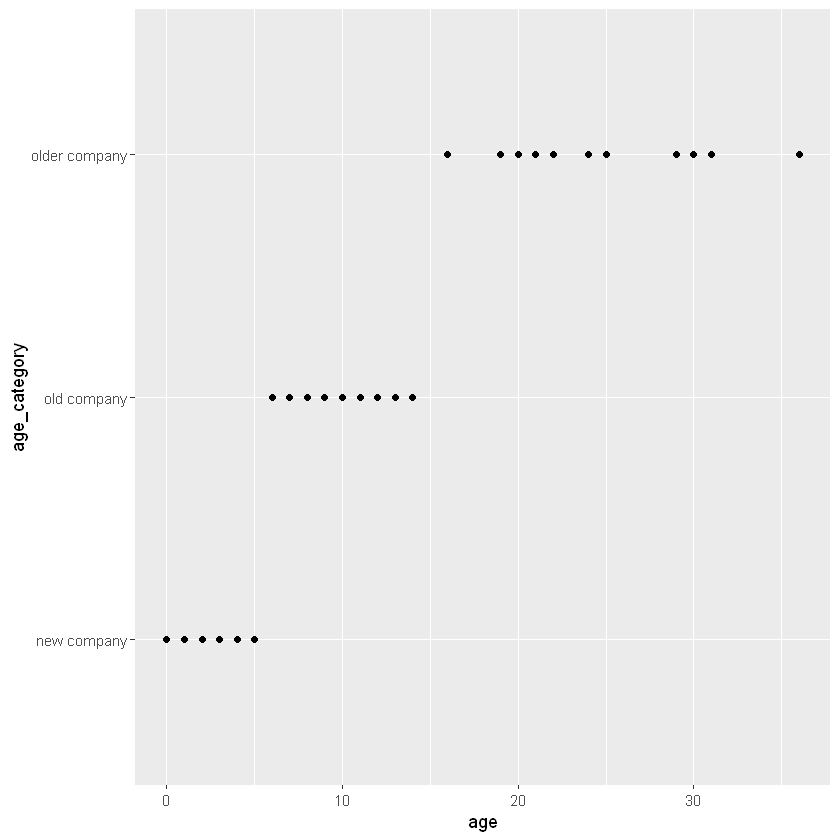

In [12]:
ggplot(data = df, mapping = aes(x = age, y =age_category)) + 
  geom_point()


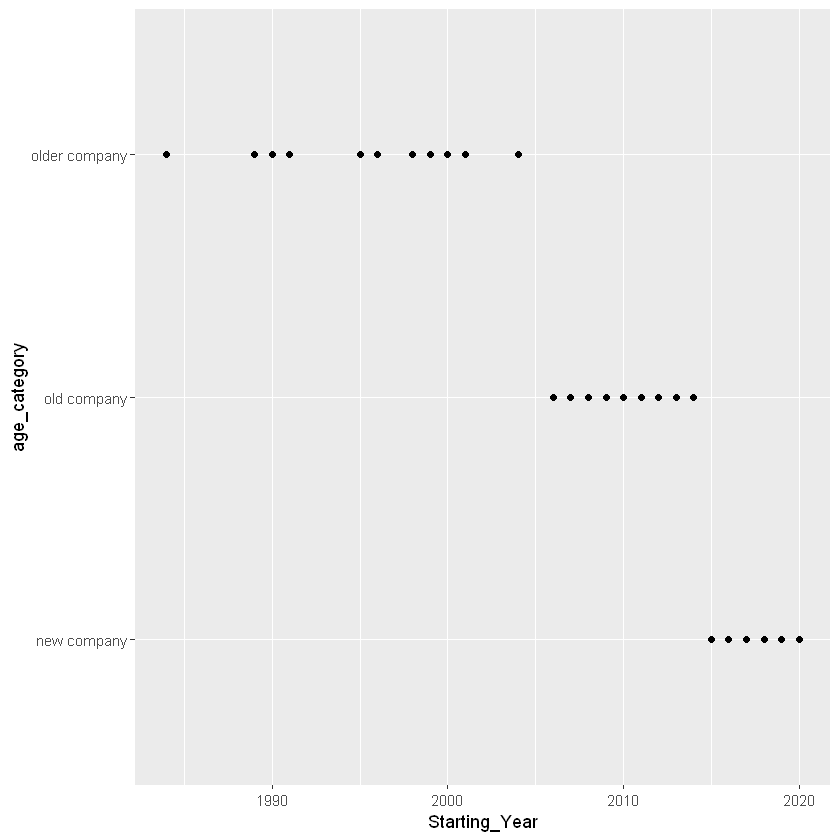

In [13]:
ggplot(data = df, mapping = aes(x =Starting_Year, y =age_category)) + 
  geom_point()
# older companies are below 2005
# old companies are in between 2005-2015
# new comanies are above 2015

In [14]:
as.data.frame(table(df$age_category))  # no. of companies as per age

Var1,Freq
<fct>,<int>
new company,165
old company,120
older company,15


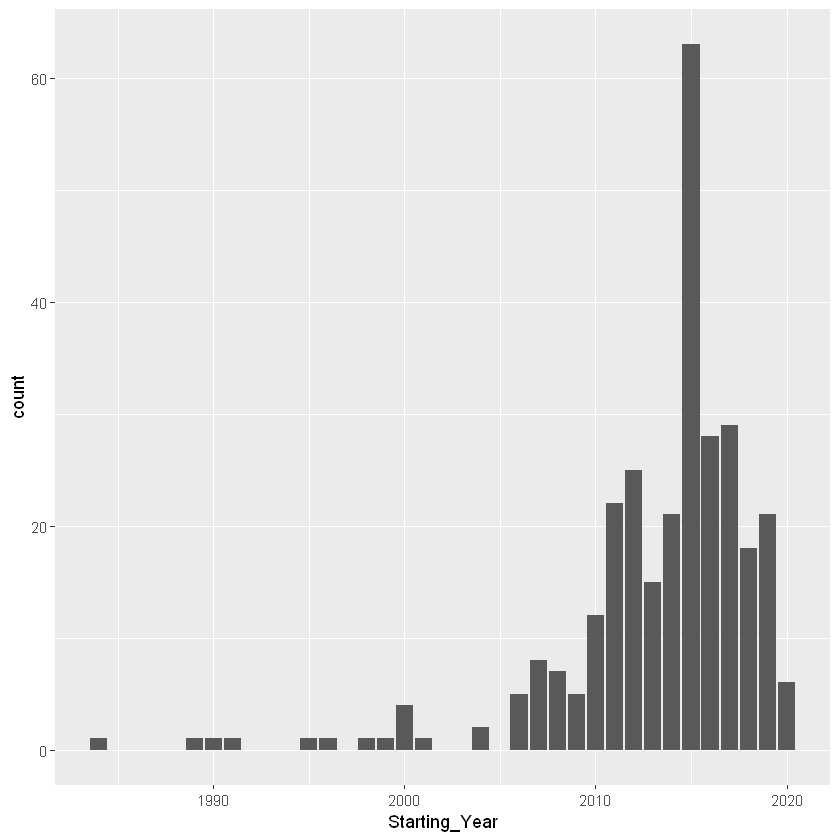

In [15]:
library(ggplot2)
p <- ggplot(df, aes(Starting_Year))
p <- p + geom_bar()
print(p)
# we get maximum startups started in between 2010-2020
# maximum startups are in 2015 which is above 60

In [16]:
as.data.frame(table(df$City)) # Maximum companies are started in bengaluru

Var1,Freq
<fct>,<int>
Ahmedabad,4
Andheri,1
Azadpur,1
Bengaluru,123
Chennai,6
Delhi,3
Faridabad,2
Gurgaon,47
Haryana,3


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  2006"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  0.0004"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 2006"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.02"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametri

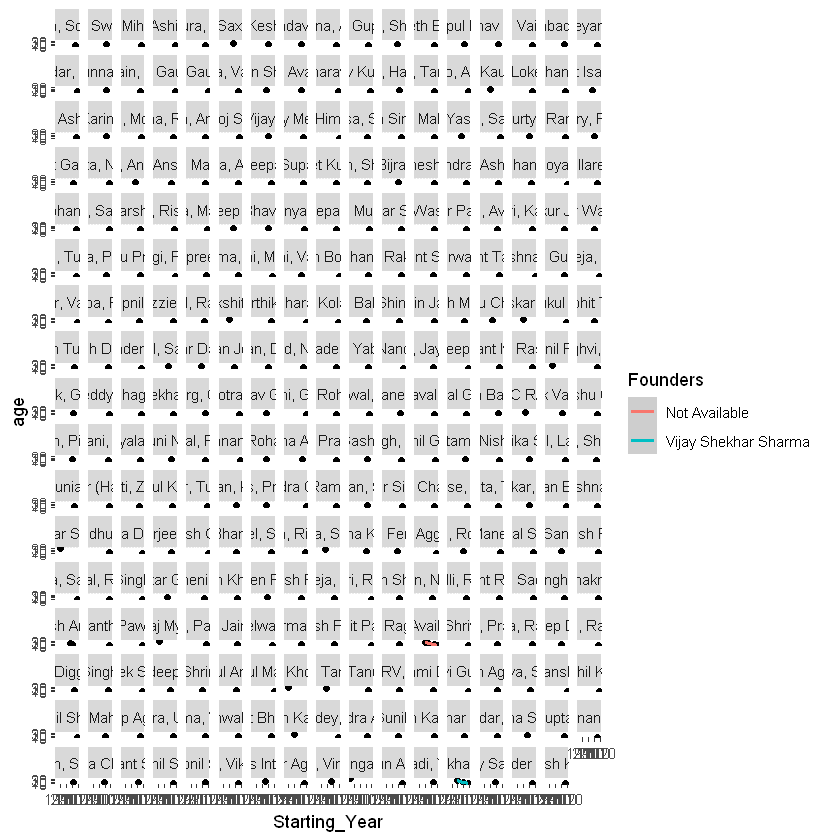

In [17]:
ggplot(data =df, mapping = aes(x =Starting_Year, y =age)) +
  geom_point() +
  geom_smooth(aes(color =Founders)) +
  facet_wrap(~Founders)
# Showing vijay shekhar sharma has highest startups

In [18]:
df %>% 
    group_by(Founders) %>%
    summarise(avg_Funding = mean(Company), 
              min_Funding = min(Company), 
              max_Funding = max(Company),
              total = n())
# Showing vijay shekhar sharma has highest strtup

Warning message:
"There were 288 warnings in `summarise()`.
The first warning was:
ℹ In argument: `avg_Funding = mean(Company)`.
ℹ In group 1: `Founders = "Aaditya Sharda, Souvik Sengupta"`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 287 remaining warnings."


Founders,avg_Funding,min_Funding,max_Funding,total
<chr>,<dbl>,<chr>,<chr>,<int>
"Aaditya Sharda, Souvik Sengupta",NA,Infra.Market,Infra.Market,1
"Aakrit Vaish, Swapan Rajdev",NA,Haptik,Haptik,1
"Aarti Gill, Mihir Gadani",NA,OZiva,OZiva,1
"Abhay Girnara, Amit Jain, Amrita Sirohia, Ashish Kashyap, Monika Dua, Pratiksha Dake",NA,INDwealth,INDwealth,1
"Abhay Hanjura, Vivek Gupta",NA,Licious,Licious,1
"Abhay Singhal, Amit Gupta, Mohit Saxena, Naveen Tewari, Piyush Shah",NA,InMobi,InMobi,1
"Abhijit Bose, Bala Parthasarathy, Bhaktha Keshavachar, Sanjay Swamy, Shripati Acharya",NA,Ezetap,Ezetap,1
"Abhimanyu Dhamija, Abhishek Anand, Advitiya Sharma, Amrit Raj, Neeraj Bhunwal, Rahul Yadav, Ravish Naresh, Rishabh Agrawal, Sanat Ghosh, Saurabh Goyal, Snehil Buxy, Vaibhav Tolia",NA,Housing.com,Housing.com,1
"Abhimanyu Saxena, Anshuman Singh",NA,InterviewBit,InterviewBit,1


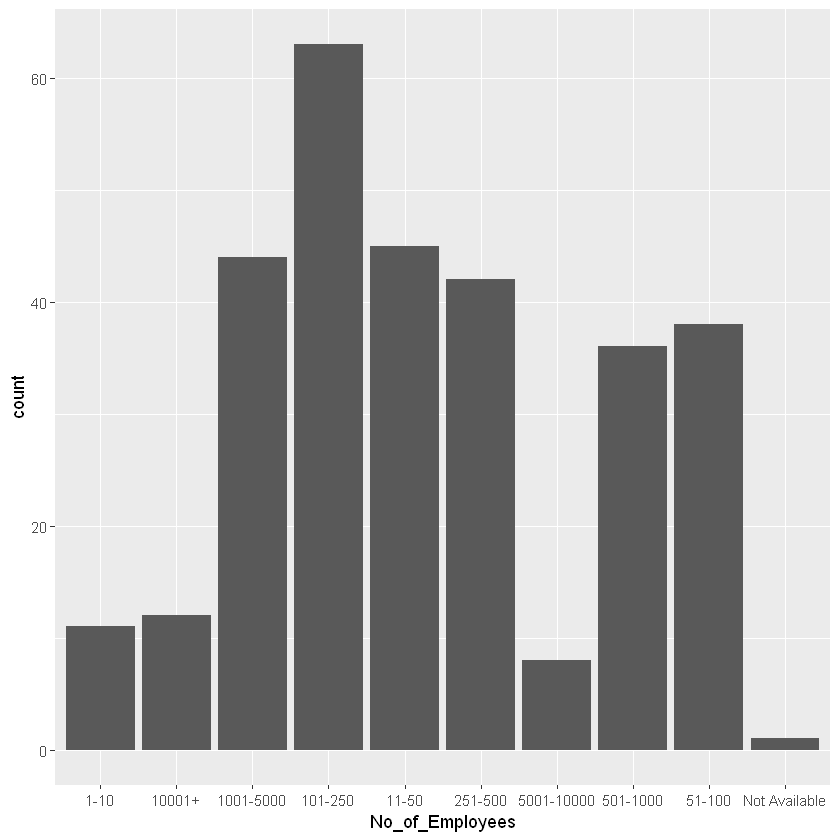

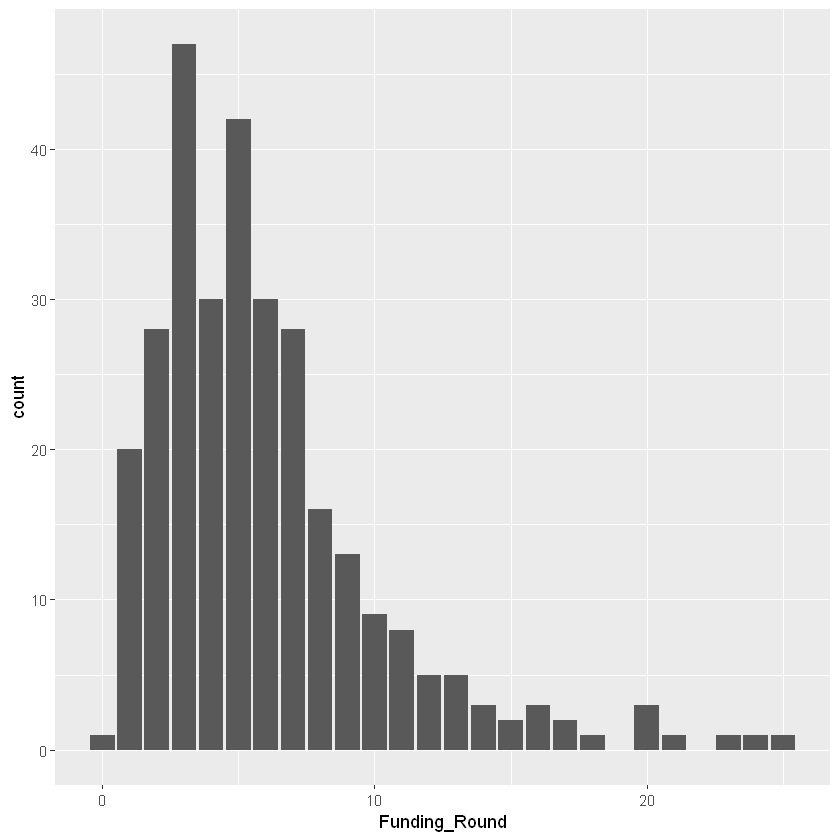

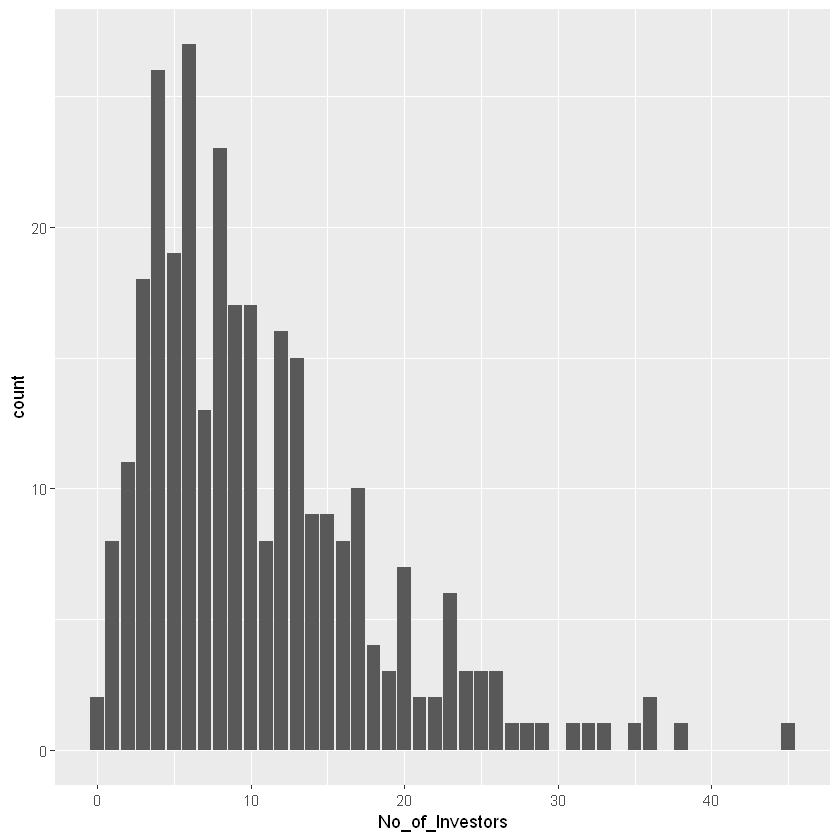

In [19]:
library(ggplot2)
p <- ggplot(df, aes(No_of_Employees))
p <- p + geom_bar()
print(p)
# Mostly startups has of employee numbers 101-250
library(ggplot2)
p <- ggplot(df, aes(Funding_Round))
p <- p + geom_bar()
print(p)
# more than 45 startups has 3 funding round 
# more than 40 startups has 5 funding round 
library(ggplot2)
p <- ggplot(df, aes(No_of_Investors))
p <- p + geom_bar()
print(p)
# mostly startups has 4-6 investers

In [20]:
df %>% 
    summarise(avg_Funding = mean(Funding_Amount_in), 
              min_Funding = min(Funding_Amount_in),
              max_Funding = max(Funding_Amount_in),
              total = n())

avg_Funding,min_Funding,max_Funding,total
<dbl>,<dbl>,<dbl>,<int>
314865494,0,24767620475,300


In [21]:
df %>% arrange(Funding_Amount_in, order(Company))
    
# Relience jio has highest fundings

Company,City,Starting_Year,Founders,No_of_Employees,Funding_Amount_in,Funding_Round,No_of_Investors,Industries_type.1,Industries_type.2,age,age_category
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
WOW Skin Science India Ltd,Bengaluru,2016,Not Available,Not Available,0,0,0,Beauty,Consumer Goods,4,new company
Digital Class E-Learning Marketplace,Ahmedabad,2017,"Hitesh Mohkar, Tushar Dhakate",11-50,42000,1,0,B2B,B2C,3,new company
Convin,Bengaluru,2019,"Ashish Santhalia, Atul Shree, Bharat Patidar, Durgesh Choudhary",11-50,300000,1,7,Analytics,Artificial Intelligence,1,new company
Polygon (Previously Matic Network),Mumbai,2017,Not Available,11-50,450000,3,4,Blockchain,None,3,new company
BimaPe,Mumbai,2020,Rahul Mathur,1-10,545000,2,5,Consumer Applications,FinTech,0,new company
Fyllo,Bengaluru,2019,"Sachin Gautam, Sudhanshu Rai, Sumit Sheoran",11-50,557033,4,6,Agriculture,AgTech,1,new company
PlanetSpark,Gurgaon,2016,"Kunal Malik, Maneesh Dhooper",1-10,576000,2,4,E-Learning,EdTech,4,new company
F5 Refreshement,New Delhi,2018,"Lalit Aggarwal, Raghav Arora",51-100,621291,2,6,Food and Beverage,None,2,new company
Flatheads,Bengaluru,2019,"Ganesh Balakrishnan, Utkarsh Biradar",11-50,725000,2,7,E-Commerce,Fashion,1,new company


In [22]:
df %>% arrange(Funding_Amount_in, order(City))
    
# Mumbai city companies has highest fundings

Company,City,Starting_Year,Founders,No_of_Employees,Funding_Amount_in,Funding_Round,No_of_Investors,Industries_type.1,Industries_type.2,age,age_category
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
WOW Skin Science India Ltd,Bengaluru,2016,Not Available,Not Available,0,0,0,Beauty,Consumer Goods,4,new company
Digital Class E-Learning Marketplace,Ahmedabad,2017,"Hitesh Mohkar, Tushar Dhakate",11-50,42000,1,0,B2B,B2C,3,new company
Convin,Bengaluru,2019,"Ashish Santhalia, Atul Shree, Bharat Patidar, Durgesh Choudhary",11-50,300000,1,7,Analytics,Artificial Intelligence,1,new company
Polygon (Previously Matic Network),Mumbai,2017,Not Available,11-50,450000,3,4,Blockchain,None,3,new company
BimaPe,Mumbai,2020,Rahul Mathur,1-10,545000,2,5,Consumer Applications,FinTech,0,new company
Fyllo,Bengaluru,2019,"Sachin Gautam, Sudhanshu Rai, Sumit Sheoran",11-50,557033,4,6,Agriculture,AgTech,1,new company
PlanetSpark,Gurgaon,2016,"Kunal Malik, Maneesh Dhooper",1-10,576000,2,4,E-Learning,EdTech,4,new company
F5 Refreshement,New Delhi,2018,"Lalit Aggarwal, Raghav Arora",51-100,621291,2,6,Food and Beverage,None,2,new company
Flatheads,Bengaluru,2019,"Ganesh Balakrishnan, Utkarsh Biradar",11-50,725000,2,7,E-Commerce,Fashion,1,new company


In [23]:
df %>% arrange(age, order(Company))
# Five Star Business Finance is oldest one

Company,City,Starting_Year,Founders,No_of_Employees,Funding_Amount_in,Funding_Round,No_of_Investors,Industries_type.1,Industries_type.2,age,age_category
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
unlu,Gurgaon,2020,"Akshay Pruthi, Anurag Dalia, Himanshu Periwal, Vipul Agrawal",11-50,1284058,2,4,Celebrity,Internet,0,new company
BimaPe,Mumbai,2020,Rahul Mathur,1-10,545000,2,5,Consumer Applications,FinTech,0,new company
Koo App,Bengaluru,2020,"Aprameya Radhakrishna, Mayank Bidawatka",11-50,33997488,3,10,Apps,Internet,0,new company
Teachmint,Bengaluru,2020,"Anshuman Kumar, Divyansh Bordia, Mihir Gupta, Payoj Jain",51-100,20000000,3,5,E-Learning,EdTech,0,new company
Zolve,Bengaluru,2020,Not Available,11-50,15000000,1,9,Banking,Financial Services,0,new company
Bimaplan,Bengaluru,2020,Not Available,1-10,3000000,2,27,Financial Services,Insurance,0,new company
Plum,Bengaluru,2019,"Abhishek Poddar, Saurabh Arora",11-50,20645163,5,23,Employee Benefits,Health Care,1,new company
Masai School,Bengaluru,2019,Prateek Shukla,1-10,7483079,3,4,E-Learning,Education,1,new company
Kodo,Mumbai,2019,"Deepti Sanghi, Gaurav Thapa",11-50,8736466,2,5,B2B,Financial Services,1,new company


In [24]:
df %>% arrange(Funding_Round, order(Company))
# Ola has highest funding rounds

Company,City,Starting_Year,Founders,No_of_Employees,Funding_Amount_in,Funding_Round,No_of_Investors,Industries_type.1,Industries_type.2,age,age_category
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>
WOW Skin Science India Ltd,Bengaluru,2016,Not Available,Not Available,0,0,0,Beauty,Consumer Goods,4,new company
Avataar.Me,Bengaluru,2016,"Gaurav Baid, Mayank Tiwari, Prashanth Aluru, Sravanth Aluru",51-100,7000000,1,1,3D Technology,Augmented Reality,4,new company
Digital Class E-Learning Marketplace,Ahmedabad,2017,"Hitesh Mohkar, Tushar Dhakate",11-50,42000,1,0,B2B,B2C,3,new company
InstantPay,New Delhi,2013,Shailendra Agarwal,51-100,4080000,1,2,E-Commerce,Electronics,7,old company
SBI Life,Mumbai,2001,Not Available,10001+,742000000,1,2,Financial Services,Health Care,19,older company
SafexPay,Thane,2017,Ravi Gupta,51-100,5280000,1,2,FinTech,Payments,3,new company
Freight Tiger,Mumbai,2014,Swapnil Shah,11-50,6600000,1,3,Automotive,Logistics,6,old company
Aknamed,Bengaluru,2018,"Saurabh Pandey, Varun Vohra",51-100,7000000,1,1,Health Care,Hospital,2,new company
Convin,Bengaluru,2019,"Ashish Santhalia, Atul Shree, Bharat Patidar, Durgesh Choudhary",11-50,300000,1,7,Analytics,Artificial Intelligence,1,new company


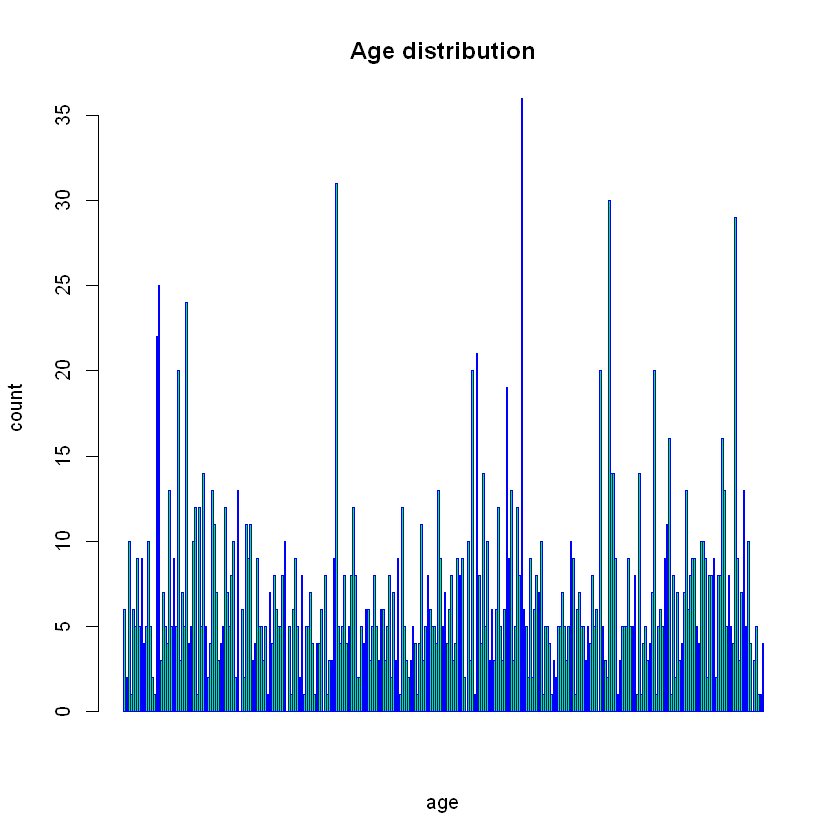

In [25]:
barplot(df$age,
main="Age distribution",
xlab="age",
ylab="count",
col="green",
border = "blue")

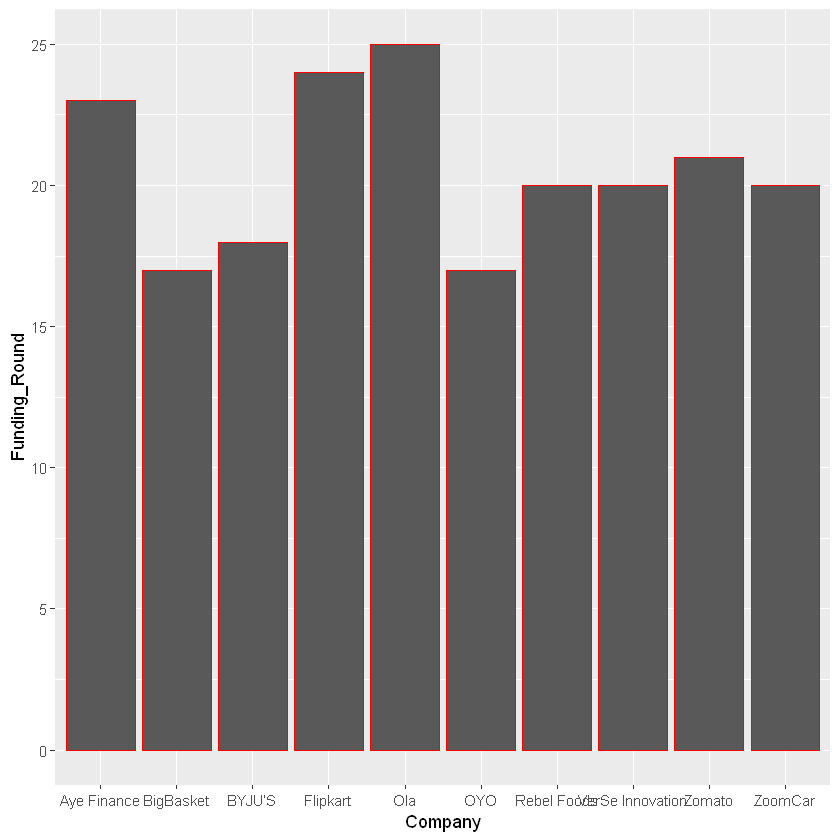

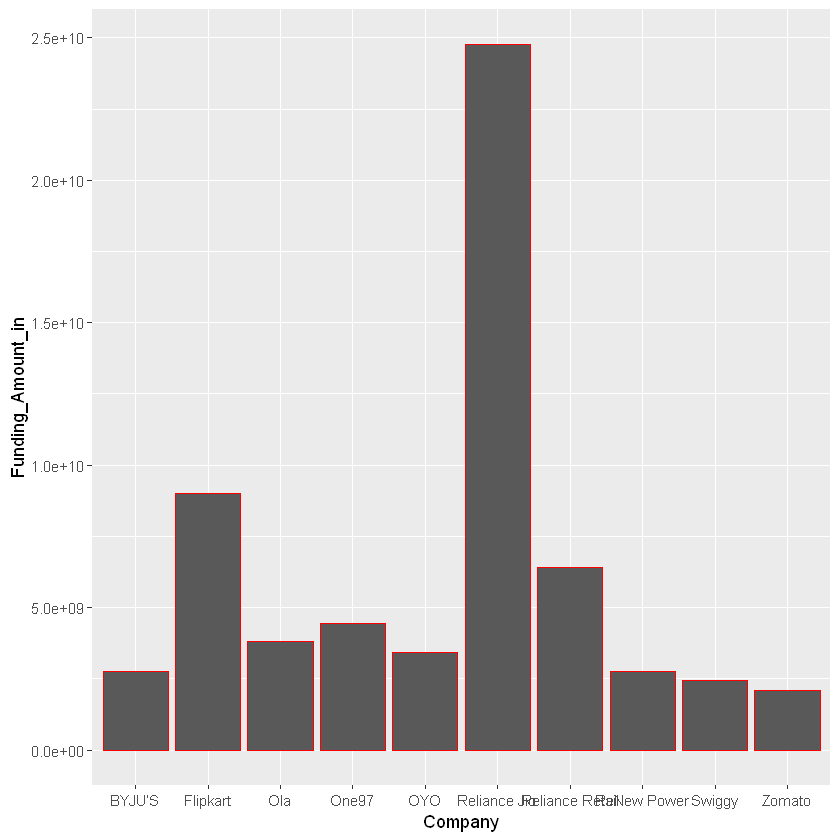

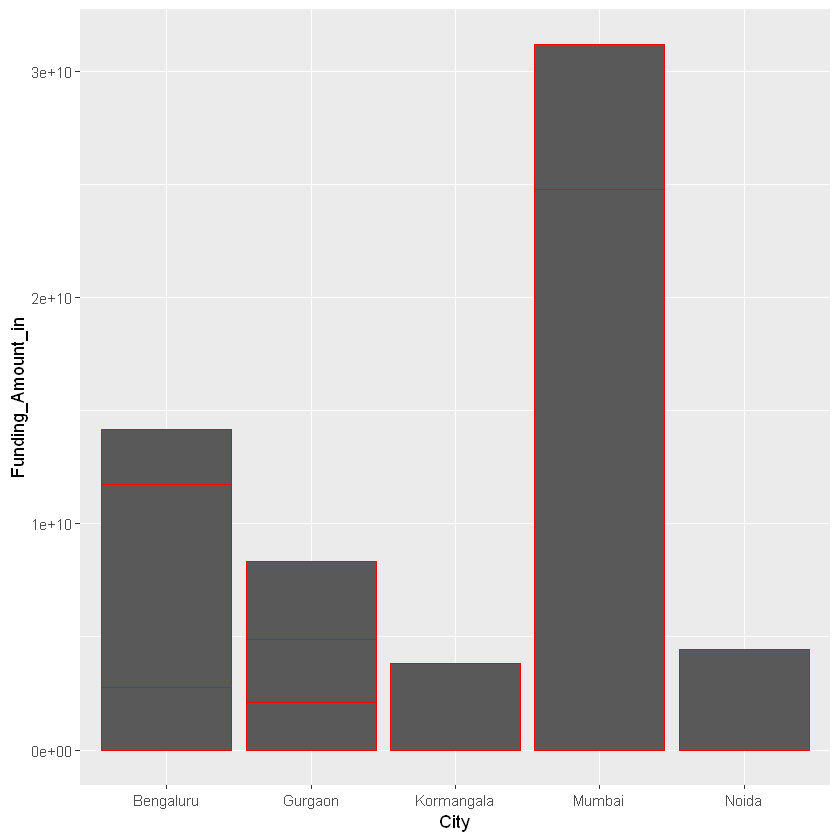

In [26]:
# Top 10 Funding_Round companies
df %>%
  top_n(10, Funding_Round) %>%
  ggplot()+geom_bar(mapping=aes(x=Company,y=Funding_Round),stat = "identity",col="red")
# Top 10 companies having high Fundung_amount_in 
df %>%
  top_n(10,Funding_Amount_in) %>%
  ggplot()+geom_bar(mapping=aes(x=Company,y=Funding_Amount_in),stat = "identity",col="red")
# Top cities having high funding 
df %>%
  top_n(10,Funding_Amount_in) %>%
  ggplot()+geom_bar(mapping=aes(x=City,y=Funding_Amount_in),stat = "identity",col="red")

In [28]:
#From this Dataset we can say that
#Reliance Jio is highest_funding_in company with funding round lower than Ola
#Bengluru city had a highest startup companies but Funding amount is lower than Mumbai
# Mostly startups has of employee numbers 101-250 
# Showing vijay shekhar sharma has highest strtups with 3
